In [70]:
import pandas as pd
import random
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12

In [16]:
house_df = pd.read_csv('/Users/risharane/Downloads/Real estate.csv')

In [17]:
house_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## Data Cleaning

In [20]:
# Removing the invalid date and month (just considering year)
house_df['X1 transaction date'] = house_df['X1 transaction date'].astype(int)

In [19]:
house_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [21]:
# Changing the column names
house_df.rename(columns = {'X1 transaction date' : 'transaction_year'}, inplace = True)
house_df.rename(columns = {'X2 house age' : 'house_age'}, inplace = True)
house_df.rename(columns = {'X3 distance to the nearest MRT station' : 'nearest_mrt_station'}, inplace = True)
house_df.rename(columns = {'X4 number of convenience stores' : 'no_of_stores_nearby'}, inplace = True)
house_df.rename(columns = {'X5 latitude' : 'latitude'}, inplace = True)
house_df.rename(columns = {'X6 longitude' : 'longitude'}, inplace = True)
house_df.rename(columns = {'Y house price of unit area' : 'house_price_of_unit_area'}, inplace = True)

In [31]:
house_df['house_age'] = house_df['house_age'].astype(int)

In [32]:
house_df

,No,transaction_year,house_age,nearest_mrt_station,no_of_stores_nearby,latitude,longitude,house_price_of_unit_area,region
0,1,2012,32,84.87882,10,24.98298,121.54024,37.9,southwest
1,2,2012,19,306.59470,9,24.98034,121.53951,42.2,northwest
2,3,2013,13,561.98450,5,24.98746,121.54391,47.3,southeast
3,4,2013,13,561.98450,5,24.98746,121.54391,54.8,southeast
4,5,2012,5,390.56840,5,24.97937,121.54245,43.1,northeast
...,...,...,...,...,...,...,...,...,...
409,410,2013,13,4082.01500,0,24.94155,121.50381,15.4,northeast
410,411,2012,5,90.45606,9,24.97433,121.54310,50.0,northeast
411,412,2013,18,390.96960,7,24.97923,121.53986,40.6,southwest
412,413,2013,8,104.81010,5,24.96674,121.54067,52.5,southeast


In [33]:
# All other data seems proper
house_df.describe()

,No,transaction_year,house_age,nearest_mrt_station,no_of_stores_nearby,latitude,longitude,house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2012.695652,17.292271,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.460687,11.333769,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.000000,9.000000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.000000,16.000000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.000000,28.000000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.000000,43.000000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [34]:
# Adding a new region column
region = ['northeast', 'northwest', 'southeast', 'southwest']
house_df['region'] = random.choices(region, k = 414)

In [35]:
house_df

,No,transaction_year,house_age,nearest_mrt_station,no_of_stores_nearby,latitude,longitude,house_price_of_unit_area,region
0,1,2012,32,84.87882,10,24.98298,121.54024,37.9,southeast
1,2,2012,19,306.59470,9,24.98034,121.53951,42.2,northwest
2,3,2013,13,561.98450,5,24.98746,121.54391,47.3,northwest
3,4,2013,13,561.98450,5,24.98746,121.54391,54.8,northeast
4,5,2012,5,390.56840,5,24.97937,121.54245,43.1,southeast
...,...,...,...,...,...,...,...,...,...
409,410,2013,13,4082.01500,0,24.94155,121.50381,15.4,southeast
410,411,2012,5,90.45606,9,24.97433,121.54310,50.0,southeast
411,412,2013,18,390.96960,7,24.97923,121.53986,40.6,northeast
412,413,2013,8,104.81010,5,24.96674,121.54067,52.5,southeast


## EDA Data Visualization

#### 1. Effect of house_age on price

In [38]:
px.scatter(house_df, x = 'house_age', y = 'house_price_of_unit_area', title = 'Effect of house_age on price')

Conclusion : house_age doesn't have any major effect on price

#### 2. Effect of nearest_mrt_station on price

In [39]:
px.scatter(house_df, x = 'nearest_mrt_station', y = 'house_price_of_unit_area', title = 'Effect of nearest_mrt_station on price' )

Conclusion : Price increases for the house which have a mrt_station near them

#### 3. Effect of no_of_stores_nearby on price

In [41]:
px.violin(house_df, x = 'no_of_stores_nearby', y = 'house_price_of_unit_area', title = 'Effect of no_of_stores_nearby on price')

Conclusion : We can see the increase in bulk as the no. of shops nearby house increases

#### 4. Effect of latitude on price

In [45]:
px.scatter(house_df, x = 'latitude', y = 'house_price_of_unit_area', title = 'Effect of latitude on price')

Conclusion : As latitude increases, price increases slighty

#### 5. Effect of longitude on price

In [46]:
px.scatter(house_df, x = 'longitude', y = 'house_price_of_unit_area', title = 'Effect of longitude on price')

Conclusion : As longitude increases, price increases slighty

#### 7. Effect of year on price

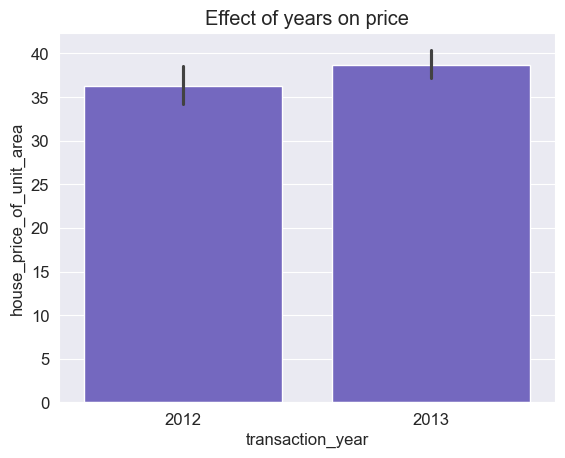

In [137]:
plt.title('Effect of years on price')
sns.barplot(x = 'transaction_year', y = 'house_price_of_unit_area', data = house_df, color = 'slateblue');

Conclusion : Year doesn't have a noticable effect on price

#### 8. Effect of region on price

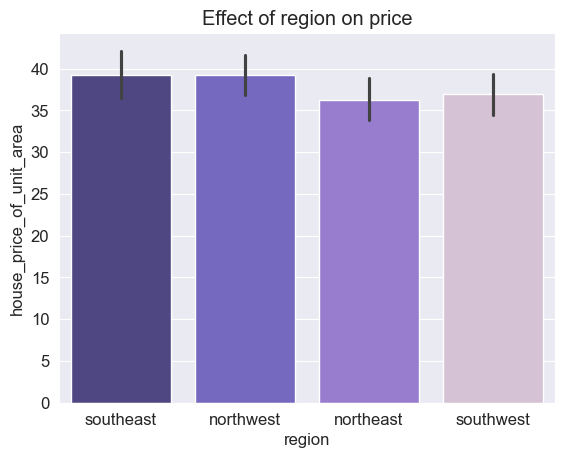

In [147]:
plt.title('Effect of region on price')
sns.barplot(x = 'region', y = 'house_price_of_unit_area', data = house_df, palette = ['darkslateblue','slateblue', 'mediumpurple', 'thistle']);

Conclusion : Prices are comparatively high for southeast and northwest region

## One hot encoding - Converting categorical columns into numeric

Converting the 'region' column into numeric

In [55]:
encode = preprocessing.OneHotEncoder()

In [63]:
encode.fit(house_df[['region']])

OneHotEncoder()

In [64]:
encode.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [66]:
region_arrays = encode.transform(house_df[['region']]).toarray()
region_arrays

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [68]:
house_df[['northeast', 'northwest', 'southeast', 'southwest']] = region_arrays

In [69]:
house_df

,No,transaction_year,house_age,nearest_mrt_station,no_of_stores_nearby,latitude,longitude,house_price_of_unit_area,region,northeast,northwest,southeast,southwest
0,1,2012,32,84.87882,10,24.98298,121.54024,37.9,southeast,0.0,0.0,1.0,0.0
1,2,2012,19,306.59470,9,24.98034,121.53951,42.2,northwest,0.0,1.0,0.0,0.0
2,3,2013,13,561.98450,5,24.98746,121.54391,47.3,northwest,0.0,1.0,0.0,0.0
3,4,2013,13,561.98450,5,24.98746,121.54391,54.8,northeast,1.0,0.0,0.0,0.0
4,5,2012,5,390.56840,5,24.97937,121.54245,43.1,southeast,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,410,2013,13,4082.01500,0,24.94155,121.50381,15.4,southeast,0.0,0.0,1.0,0.0
410,411,2012,5,90.45606,9,24.97433,121.54310,50.0,southeast,0.0,0.0,1.0,0.0
411,412,2013,18,390.96960,7,24.97923,121.53986,40.6,northeast,1.0,0.0,0.0,0.0
412,413,2013,8,104.81010,5,24.96674,121.54067,52.5,southeast,0.0,0.0,1.0,0.0


Conclusion : Now our categorical column is successfully converted into numeric value using one hot encoder

In [80]:
X = house_df[['house_age', 'nearest_mrt_station', 'no_of_stores_nearby', 'latitude', 'longitude', 'northeast', 'northwest', 'southeast', 'southwest']]
y = house_df['house_price_of_unit_area']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [88]:
X_test.shape

(42, 9)

In [89]:
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression()

In [94]:
X_test.head(5)

,house_age,nearest_mrt_station,no_of_stores_nearby,latitude,longitude,northeast,northwest,southeast,southwest
358,1,193.5845,6,24.96571,121.54089,0.0,0.0,1.0,0.0
350,13,492.2313,5,24.96515,121.53737,0.0,0.0,0.0,1.0
373,0,274.0144,1,24.97480,121.53059,0.0,1.0,0.0,0.0
399,12,170.1289,1,24.97371,121.52984,1.0,0.0,0.0,0.0
369,20,2185.1280,3,24.96322,121.51237,1.0,0.0,0.0,0.0


In [95]:
y_test.head(5)

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
Name: house_price_of_unit_area, dtype: float64

In [91]:
model.predict(X_test)

array([48.73225219, 42.53803639, 43.88289559, 40.73643029, 29.36046981,
       43.10192024, 45.04073606, 44.74538626, 25.19797907, 52.96068553,
       31.2205104 , 35.71868318, 40.30764078, 23.87748748, 34.32691406,
       33.74494629, 40.71782597, 47.97517793, 30.68078402, 45.0719419 ,
        1.05943303, 32.83826562, 46.94573325, 42.70290652, 13.41611268,
       40.69552342, 13.91351324, 45.40772838, 34.72092203, 37.50065808,
       10.79102884, 40.14710646, 36.67423473, 27.37108803, 45.02181958,
       31.76419392, 51.59237474, 16.09900469, 45.63594974, 40.49735576,
       36.1222887 , 39.39452289])

Conclusion: if house is 1 yr old, have an MRT station 193 km away, have 6 nearby stores, latitude is 24, longitude is 121 and is situated in southeast region then : <br>
Actual Price(per unit area) = \\$45.1 <br>
Predicted Price(per unit area) = \\$48.7

## Weights and variance

In [124]:
model.coef_

array([-2.95349795e-01, -4.66242616e-03,  1.10635930e+00,  2.29485815e+02,
       -3.29828274e+01, -6.93041200e-01, -8.31817393e-01,  8.31843193e-01,
        6.93015400e-01])

In [125]:
type(model.coef_)

numpy.ndarray

In [129]:
df = pd.DataFrame(data = model.coef_, columns=['Coefficient'], index = ['b1','b2','b3','b4','b5','b6','b7','b8','b9'])

In [127]:
type(df)

pandas.core.frame.DataFrame

In [128]:
df

,Coefficient
b1,-0.295350
b2,-0.004662
b3,1.106359
b4,229.485815
b5,-32.982827
b6,-0.693041
b7,-0.831817
b8,0.831843
b9,0.693015


Conclusion : Value of weight b3 and b4 are high. b3 corresponds to no. of stores nearby & b4 corresponds to latitude. <br> This means that the house price (per uit area) highly depends on no. of stores nearby and latitude.

In [132]:
B_0 = model.intercept_
print(f'B0(y-intercept) = {B_0}')

B0(y-intercept) = -1678.053922540693


## Regression Metrics

In [97]:
y_actual = y_test
y_predicted = model.predict(X_test)

In [99]:
print(f'MAE : ${mean_absolute_error(y_actual, y_predicted)}')

MAE : $6.2998789325805395


Conclusion: That means our model is just making a difference of around \\$6 while predicting

In [102]:
print(f'RMSE : ${np.sqrt(mean_squared_error(y_actual, y_predicted))}')

RMSE : $8.491521426779382


In [105]:
print(f'R2 Score : {r2_score(y_actual, y_predicted)}')

R2 Score : 0.6320900541210301
